In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
# Dummy data
np.random.seed(42)
n_samples = 200

# Create independent varibles with intentional multicollinearity 
X1 = np.random.randn(n_samples) * 10 + 50   # Age
X2 = np.random.randn(n_samples) * 5 + 30    # Experience
X3 = 2 * X1 + np.random.randn(n_samples) * 2  # Highly correlated with X1 (Weight)
X4 = 0.8 * X2 + np.random.randn(n_samples) * 3  # Highly correlated with X2 (Salary)
X5 = np.random.randn(n_samples) * 15 + 100  # Independent variable (IQ)

# Create target variable (Y) as a function of X1, X2, X5
Y = 3 * X1 + 2 * X2 + 1.5 * X5 + np.random.randn(n_samples) * 10



In [24]:
df = pd.DataFrame ({
    "Age" : X1,
    "Experience" : X2,
    "Weight": X3,
    "Salary_thousands": X4, 
    "IQ_Score": X5, 
    "Performance" : Y
})
df.head()

,Age,Experience,Weight,Salary_thousands,IQ_Score,Performance
0,54.967142,31.788937,106.745428,27.702115,114.074257,413.584238
1,48.617357,32.803923,96.035964,23.476642,92.259329,359.095247
2,56.476885,35.415256,112.964258,30.941023,101.441812,393.020190
3,65.230299,35.269010,130.554558,32.282122,93.065871,399.358354
4,47.658466,23.111653,94.416802,19.729627,93.482557,336.404773


In [26]:
df.shape

(200, 6)

In [84]:
# Method 1. Correlation Matrix 
features = ["Age", "Experience", "Weight", "Salary_thousands", "IQ_Score"]
correlation_matrix = df[features].corr()
correlation_matrix.round(3)

,Age,Experience,Weight,Salary_thousands,IQ_Score
Age,1.000,0.095,0.994,0.121,-0.031
Experience,0.095,1.000,0.092,0.767,-0.142
Weight,0.994,0.092,1.000,0.127,-0.029
Salary_thousands,0.121,0.767,0.127,1.000,-0.008
IQ_Score,-0.031,-0.142,-0.029,-0.008,1.000


In [86]:
print(f" - Values close to +1 or -1 indicate high correlation")
print(f" - Values close to 0 indicate no correlation")
print(f" - Threshold: |correlation| > 0.7 suggests multicollinearity")

 - Values close to +1 or -1 indicate high correlation
 - Values close to 0 indicate no correlation
 - Threshold: |correlation| > 0.7 suggests multicollinearity


In [101]:
for i in range (len(correlation_matrix.columns)):
    #print(i)
    for j in range (i + 1, len(correlation_matrix.columns)):
        print(i,j)
    

0 1
0 2
0 3
0 4
1 2
1 3
1 4
2 3
2 4
3 4


In [91]:
# Find high correlation 
high_corr = []
for i in range (len(correlation_matrix.columns)):
    for j in range (i + 1, len (correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                "Feature 1": correlation_matrix.columns[i],
                "Feature 2": correlation_matrix.columns[j],
                "Correlation" : correlation_matrix.iloc[i, j]
            })


In [111]:
if high_corr:
    for item in high_corr:
        print(f" {item["Feature 1"]} <--> {item["Feature 2"]}: {item["Correlation"]:.3f}")

 Age <--> Weight: 0.994
 Experience <--> Salary_thousands: 0.767


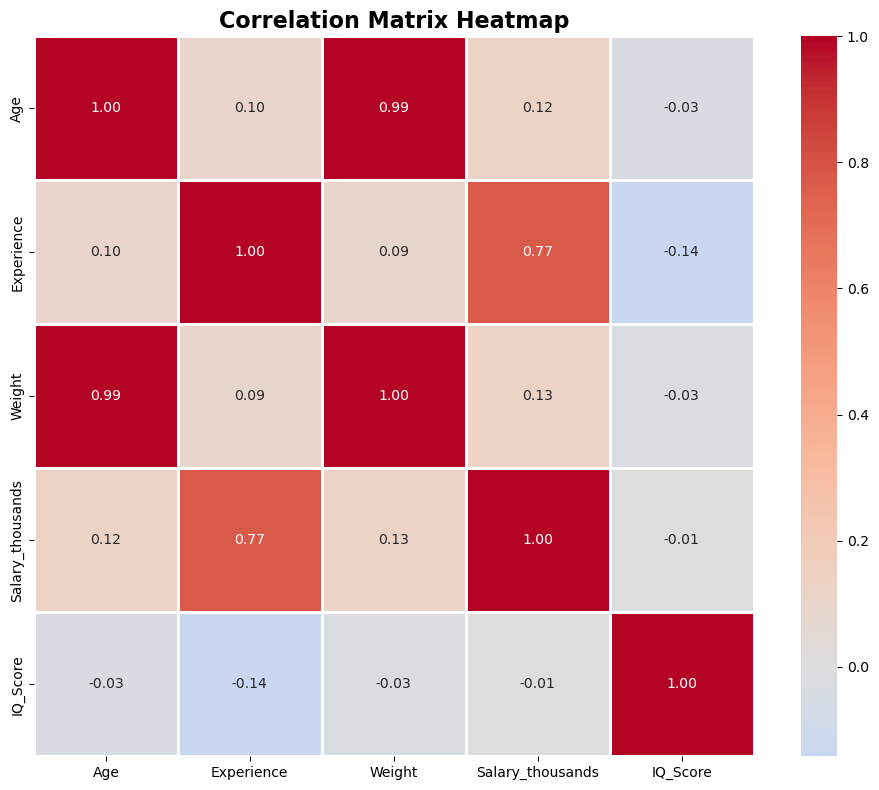

In [131]:
# Visualize correlation matrix 
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", 
            center = 0, square = True, linewidth = 2)
plt.title("Correlation Matrix Heatmap", fontsize = 16, fontweight = "bold")
plt.tight_layout()